In [1]:
import binascii
import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

sns.set(style="ticks")

In [2]:
def filter_string(input_string, replace_char_idx):
    return input_string.replace(input_string[replace_char_idx], '')

In [3]:
filter_string('apples', 1)

'ales'

In [4]:
binascii.hexlify(b'apple')

b'6170706c65'

In [5]:
int(binascii.hexlify(b'apple'), 16)

418498243685

In [6]:
binascii.unhexlify(format(418498243685, 'x'))

b'apple'

In [7]:
len(format(418498243685, 'b'))

39

In [8]:
def gen_bit_string(length=8):
    """
    :param length: int
    :return: str
    """
    return ''.join([random.choice(['0', '1']) for _ in range(length)])

In [9]:
def gen_raw_int(size=8):
    """
    :param size: int
    :return: int
    """
    return int(gen_bit_string(size), 2)

In [10]:
def get_safe_strings(size=4):
    symbols = list('abcdefghijklmnopqrstuvwxyz0123456789!@#$%^&*()_-+=[]{};:\'"",.<>/?')
    return ''.join(random.sample(symbols, size))

In [11]:
def experiment():
    data = {
        'x': [],
        'f(x)': [],
        'input_len': [],
        'raw_string': [],
        'filter_idx': [],
        'output': []
    }
    for i in range(500):
        random_length = random.randint(2, 20)
        random_string = get_safe_strings(size=random_length)

        data['raw_string'].append(random_string)
        data['input_len'].append(len(random_string))
        
        arg = int(binascii.hexlify(random_string.encode('utf8')), 16)
        data['x'].append(arg)
        
        idx = random.randint(0, len(random_string) - 1)
        data['filter_idx'].append(idx)
        
        output = filter_string(random_string, idx)
        data['output'].append(output)
        
        output_bytes = int(binascii.hexlify(output.encode('utf8')), 16)
        data['f(x)'].append(output_bytes)
        
    df = pd.DataFrame(data, columns=['x', 'f(x)', 'input_len', 'filter_idx', 'raw_string', 'output'])
    df['x'] = pd.to_numeric(df['x'])
    df['f(x)'] = pd.to_numeric(df['f(x)'])
    df['x'] = (df['x']-df['x'].min())/(df['x'].max()-df['x'].min())
    df['f(x)'] = (df['f(x)']-df['f(x)'].min())/(df['f(x)'].max()-df['f(x)'].min())
    return df

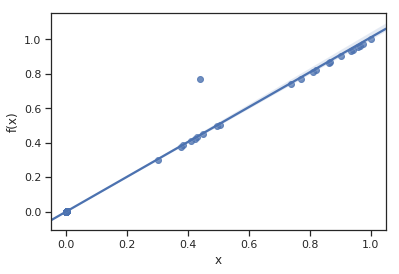

In [12]:
result = experiment()

sns.regplot(x="x", y="f(x)", data=result)

In [13]:
def experiment_join():
    data = {
        'x1': [],
        'x2': [],
        'f(x1, x2)': [],
        'raw_string_1': [],
        'raw_string_2': [],
        'output': []
    }
    for i in range(100):
        random_string_1 = get_safe_strings(size=random.randint(3, 20))
        data['raw_string_1'].append(random_string_1)

        random_string_2 = get_safe_strings(size=random.randint(3, 20))
        data['raw_string_2'].append(random_string_2)
        
        arg_1 = int(binascii.hexlify(random_string_1.encode('utf8')), 16)
        data['x1'].append(arg_1)
        
        arg_2 = int(binascii.hexlify(random_string_2.encode('utf8')), 16)
        data['x2'].append(arg_2)
        
        output = random_string_1 + random_string_2
        data['output'].append(output)
        
        output_bytes = int(binascii.hexlify(output.encode('utf8')), 16)
        data['f(x1, x2)'].append(output_bytes)

        df = pd.DataFrame(data, columns=['x1', 'x2', 'f(x1, x2)'])
        df['x1'] = pd.to_numeric(df['x1'])
        df['x2'] = pd.to_numeric(df['x2'])
        df['f(x1, x2)'] = pd.to_numeric(df['f(x1, x2)'])
        df['x1'] = (df['x1']-df['x1'].min())/(df['x1'].max()-df['x1'].min())
        df['x2'] = (df['x2']-df['x2'].min())/(df['x2'].max()-df['x2'].min())
        df['ff(x1, x2)'] = (df['f(x1, x2)']-df['f(x1, x2)'].min())/(df['f(x1, x2)'].max()-df['f(x1, x2)'].min())
    return df

/home/ltbringer/anaconda3/envs/fastest/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  after removing the cwd from sys.path.


Text(0.5, 0, 'f(x1, x2)')

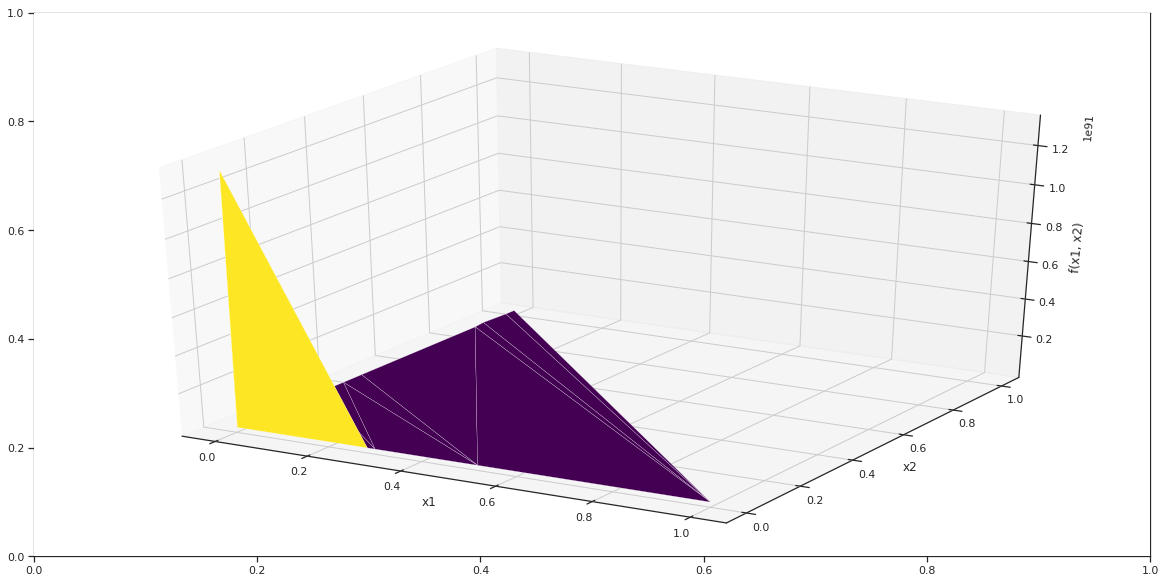

In [14]:
result = experiment_join()

fig, ax = plt.subplots(figsize=(20, 10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(result['x1'], result['x2'], result['f(x1, x2)'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')


In [15]:
def fib(n): 
    a = 0
    b = 1
    if n == 0:
        return a
    for i in range(n):
        c = a + b
        a = b
        b = c
    return b

In [16]:
def experiment():
    data = {
        'x': [],
        'f(x)': []
    }
    for i in range(1000):
        arg = random.randint(0, 10)
        data['x'].append(arg)
        output = fib(arg)
        data['f(x)'].append(output)
    df = pd.DataFrame(data, columns=['x', 'f(x)'])
    df = (df-df.min())/(df.max()-df.min())
    return df

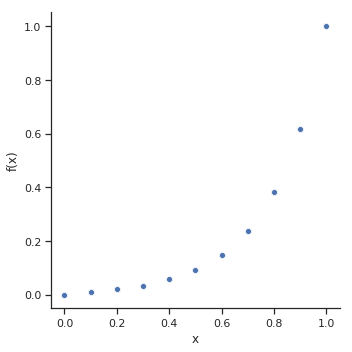

In [17]:
result = experiment()

sns.relplot(x="x", y="f(x)", data=result)

In [18]:
def str_search(haystack, needle):
    if needle in haystack:
        return haystack.index(needle)
    else:
        return -1

In [25]:
def experiment():
    data = {
        'x1': [],
        'x2': [],
        'f(x1, x2)': [],
        'raw_string': [],
        'search_string': []
    }
    for i in range(500):
        random_length = random.randint(2, 20)
        random_string = get_safe_strings(size=random_length)

        data['raw_string'].append(random_string)
        
        arg = int(binascii.hexlify(random_string.encode('utf8')), 16)
        data['x1'].append(arg)
        
        
        search_string = random.sample(list(random_string), random.randint(0, 2))
        if len(search_string) == 0:
            search_string = get_safe_strings(size=2)
        else:
            search_string = ''.join(search_string)
        data['search_string'].append(search_string)
        
        arg = int(binascii.hexlify(search_string.encode('utf8')), 16)
        data['x2'].append(arg)
        
        output = str_search(random_string, search_string)

        data['f(x1, x2)'].append(output)
        
        df = pd.DataFrame(data, columns=['x1', 'x2', 'f(x1, x2)', 'raw_string', 'search_string'])
        df['x1'] = pd.to_numeric(df['x1'])
        df['x2'] = pd.to_numeric(df['x2'])
        df['f(x1, x2)'] = pd.to_numeric(df['f(x1, x2)'])

        df['x1'] = (df['x1']-df['x1'].min())/(df['x1'].max()-df['x1'].min())
        df['x2'] = (df['x2']-df['x2'].min())/(df['x2'].max()-df['x2'].min())
        df['f(x1, x2)'] = (df['f(x1, x2)']-df['f(x1, x2)'].min())/(df['f(x1, x2)'].max()-df['f(x1, x2)'].min())
        df['f(x1, x2)'].fillna(-1, inplace=True)
    return df

In [26]:
result = experiment()

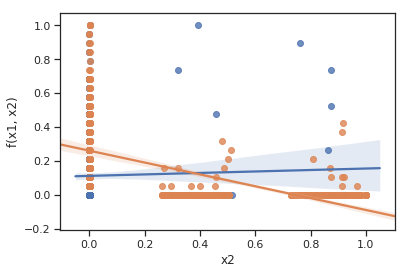

In [27]:
sns.regplot(x="x1", y="f(x1, x2)", data=result)
sns.regplot(x="x2", y="f(x1, x2)", data=result)

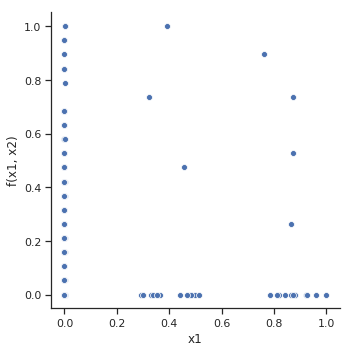

In [28]:
sns.relplot(x="x1", y="f(x1, x2)", data=result)

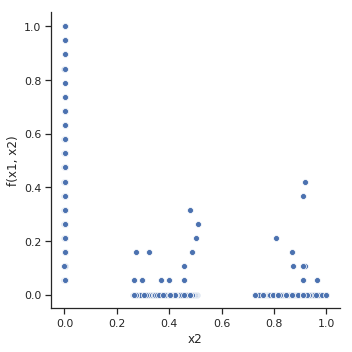

In [29]:
sns.relplot(x="x2", y="f(x1, x2)", data=result)